In [168]:
!pip install yfinance matplotlib pandas numpy

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [194]:
# Downloading data for AAPL
symbol = 'GOOG'
data = yf.download(symbol, '2023-01-01', '2025-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.378845,20738500
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.392403,27046500
2023-01-05,88.070000,88.209999,86.559998,86.769997,86.459343,23136100
2023-01-06,87.360001,88.470001,85.570000,88.160004,87.844376,26612600
2023-01-09,89.195000,90.830002,88.580002,88.800003,88.482079,22996700


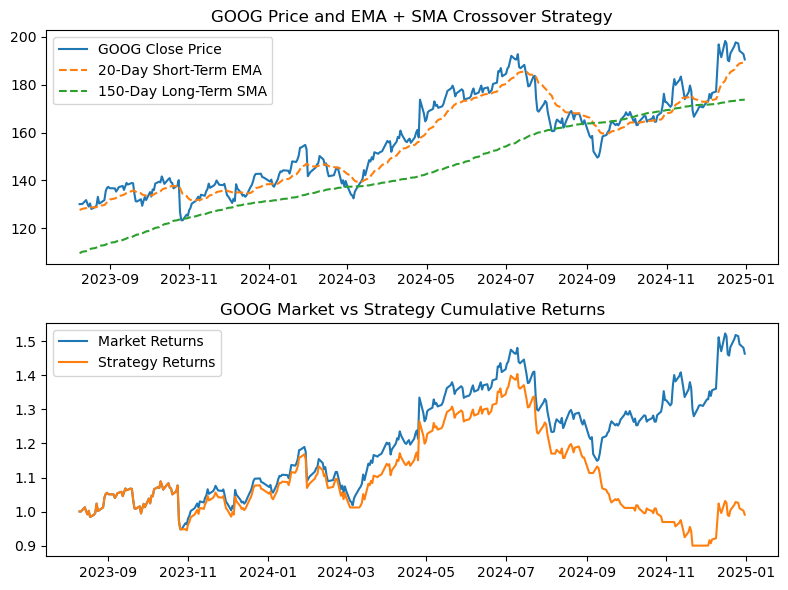

Market Return: 1.46
Strategy Return: 0.99


In [196]:
short_term_N = 20  # Short-term EMA 
long_term_N = 150  # Long-term SMA 

# EMA and SMA
data['Short_Term_EMA'] = data['Close'].ewm(span=short_term_N, adjust=False).mean()
data['Long_Term_SMA'] = data['Close'].rolling(window=long_term_N).mean()

# Buy/Sell Signals
data['Signal'] = 0
data.loc[(data['Short_Term_EMA'] > data['Long_Term_SMA']) & (data['Close'] > data['Long_Term_SMA']), 'Signal'] = 1  # Buy 
data.loc[(data['Short_Term_EMA'] < data['Long_Term_SMA']) & (data['Close'] < data['Long_Term_SMA']), 'Signal'] = -1  # Sell 

start_index = long_term_N  # Start analysis after long_term_N days (after SMA is valid)

# Filter data to start after long_term_N days
data_filtered = data.iloc[start_index:].copy()  # Data from long_term_N days onward

# Calculate Returns
data_filtered['Returns'] = data_filtered['Close'].pct_change()
data_filtered['Strategy_Returns'] = data_filtered['Returns'] * data_filtered['Signal'].shift(1)

# Cumulative Returns
data_filtered['Cumulative_Strategy_Returns'] = (1 + data_filtered['Strategy_Returns']).cumprod()
data_filtered['Cumulative_Market_Returns'] = (1 + data_filtered['Returns']).cumprod()

# Plotting
plt.figure(figsize=(8, 6))

# Plot Closing Price, EMA, and SMA
plt.subplot(2, 1, 1)
plt.plot(data_filtered['Close'], label=f'{symbol} Close Price')
plt.plot(data_filtered['Short_Term_EMA'], label=f'{short_term_N}-Day Short-Term EMA', linestyle='--')
plt.plot(data_filtered['Long_Term_SMA'], label=f'{long_term_N}-Day Long-Term SMA', linestyle='--')
plt.title(f'{symbol} Price and EMA + SMA Crossover Strategy')
plt.legend()

# Plot Cumulative Returns
plt.subplot(2, 1, 2)
plt.plot(data_filtered['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(data_filtered['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.title(f'{symbol} Market vs Strategy Cumulative Returns')
plt.legend()

plt.tight_layout()
plt.show()

# Print results
market_return = data_filtered['Cumulative_Market_Returns'].iloc[-1]
strategy_return = data_filtered['Cumulative_Strategy_Returns'].iloc[-1]
print(f"Market Return: {market_return:.2f}")
print(f"Strategy Return: {strategy_return:.2f}")


If there are no non-zero signals in the `data['Signal']` column, the resulting DataFrame will be empty, and trying to access the first index (`index[0]`) will raise an IndexError.

To fix this error, you should first check if there are any non-zero signals before trying to access the first index. If there are no non-zero signals, you can handle it appropriately, such as by raising an error or returning an empty DataFrame.

Would you like me to provide the corrected code?